In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (update filename if different)
df = pd.read_csv("/content/breast-cancer.csv")

# Drop unused columns
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)

# Convert diagnosis: M=1 (malignant), B=0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Feature matrix and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))



Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158


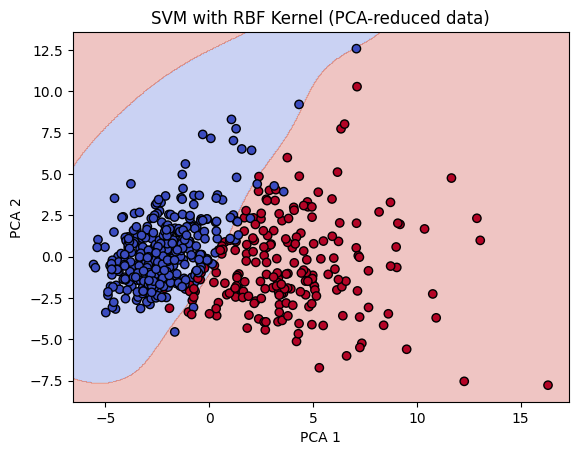

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)

# Train on reduced data
svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_2d.fit(X_vis, y)

# Plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_decision_boundary(svm_rbf_2d, X_vis, y, "SVM with RBF Kernel (PCA-reduced data)")



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)



Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9736263736263737


In [14]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


Cross-validation Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Average Accuracy: 0.9789318428815401
